# ПРАКТИКУМ по динамическому программированию.
Анашкина А.А.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.linalg import sqrtm

# Постановка задачи

Рассмотрим задачу:
$$
\begin{dcases}
\dot{x}(t) = A(t)x(t) + B(t)u(t), \\
x(t_0) = x_0 \in \chi_0, \\
u(t) \in P(t).
\end{dcases}
$$
*Определение* Множеством достижимости в момент времени $t$ из позиции $\{t_0, x_0\}$ называется множество точек
$$\chi[t] = \{x| \exist u(s), t_0 \leq s \leq t \Rightarrow x(t, t_0, x_0) = x\}.$$
Задачу можно обобщить, если предположить, что $x_0 \in \chi_0$. В этом случае множество достижимости будет определяться как
$$\chi(t, t_0, \chi_0) = \bigcup_{x_0 \in \chi_0} \chi(t, t_0, x_0).$$
Если заведомо известно, что искомое множество является выпуклым и замкнутым, то оно может быть однозначно найдено посвоей опорной функции. Таким образом, при нахождении множества достижимости можно искать не интегралы от многозначных отображений, а обычные интегралы от опорных функций для различных направлений. Причём каждо опорной функции поставим в соответствие выпунклое замкнутое множество. Таким случаем является случай, когда ограничения на множества являются эллипсоидальными:
$$\chi_0 = \varepsilon(x_0, X_0), \quad P(t) = \varepsilon(q(t), Q(t)).$$
ВАЖНО: не рассматриваем вырожденный эллипсоид, так как для внутренних оценок может получиться плохо в случае неточных вычислений, а для внешних оценок вообще не можем использовать вырожденный случай.
Необходимо построить:
1. Внутренние и внешние эллипсоидальные оценки множества достижимости.
2. Проекции множества достижимости на двумерную и трехмерную плоскости.

# Внутренние и внешние оценки для суммы эллипсоидов

Обозначим эллипсоид с центром $q \in \mathbb{R}^n$ и матрицей конфигурации $Q \in \mathbb{R}^{n \times n},\ Q = Q^* > 0$ 
$$\varepsilon(q, Q) = \{x\colon <(x - q), Q^{-1}(x - q)> \leq 1\}.$$
То есть невырожденный эллипсоид.
Нас будут интересовать верхние и нижние оценки $\varepsilon_-,\, \varepsilon_+$ суммы (по Минковскому) конечного числа эллипсоидов $ \varepsilon_1, \ldots, \varepsilon_n$:
$$\varepsilon_- \subset \varepsilon_1 + \ldots + \varepsilon_n \subset \varepsilon_+.$$

*Внешняя оценка*

Пусть $p_1, \ldots, p_n > 0$, их отношения - сингулярные числа. Покажем, что 
$$\varepsilon_+ = (p_1 + \ldots + p_n)\left(\dfrac{Q_1}{p_1} + \ldots + \dfrac{Q_n}{p_n}\right)$$
является внешней оценкой.

Действительно,
$$
\rho(l|\varepsilon_+)^2 = \sum_{i=1}^{n}<l, Q_il> + \sum_{i > j} \left(\dfrac{p_j}{p_i}<l,Q_il> + \dfrac{p_i}{p_j}<l, Q_jl>\right) \geq \\ \geq\sum_{i=1}^{n}<l,Q_il> + 2\sum_{i > j}\sqrt{<l,Q_il><l, Q_jl>} = \rho(l|\varepsilon_1 + \ldots + \varepsilon_n)^2.
$$

Равенство здесь достигается тогда и только тогда, когда $p_i = \sqrt{<l, Q_il>},\ i = 1, \ldots, n$. Таким образом, опорный вектор $\varepsilon_+$ по направлению $l$ совпадает с опорным ветором $\varepsilon_1 + \ldots + \varepsilon_n$, и потому
$$ \varepsilon_1 + \ldots + \varepsilon_n = \bigcap_{l \in S_1} \varepsilon_+(l).$$

*Внутренняя оценка*

Пусть матрица конфигурации для $\varepsilon_-$
$$Q_- = Q_*^*Q_*, \quad Q_* = \sum_{i=1}^{n}S_iQ_i^\frac12,$$
где $S_i$ - ортогональные матрицы.

С помощью неравенства Коши--Буняковского можно показать, что $Q_-$ действительно является внутренней оценкой, и, более того $\rho(l|\mathcal{E}_-) = \rho(l|\mathcal{E}_1 + \ldots + \mathcal{E}_n)$ в том и только том случае, когда $S_iQ_i^\frac12l = \lambda_iS_1Q_1^\frac12l$.
В этом случае вычисления неоднозначны, так как матрица перехода $S$ определена неоднозначно.

# Оценки для интеграла

Рассмотрим выражение 
$$I(t) = \varepsilon_0(0, Q_0) + \int\limits_{t_0}^{t}\varepsilon(0, Q(\tau))d\tau$$
-интеграл от эллипсоида $\varepsilon(0, Q(t)))$ по переменной $\tau \in [t_0, t]$. Введем разбиение $\{\tau_i\}_{i = 1}^{N}$ отрезка интегрирования $[t_0, t]$ и будем представлять интеграл в виде сумм 
$$
I(t) = \lim\limits_{N \rightarrow \infty}I_N,
$$
где $I_N = \varepsilon_0 + \sum\limits_{i = 1}^{N}\delta \varepsilon_i,\quad \delta = \dfrac{t - t_0}{N}, \quad \varepsilon_{i} = \varepsilon(0, Q(\tau_i)).
$

*Внешняя оценка*

Матрица конфигурации внешней оценки интегральной суммы находится по формуле
$$
Q_+^N = ( p_0 + \sum_{i = 1}^{N}p_i)( \dfrac{Q_0}{p_0} + \sum_{i = 1}^{N} \dfrac{Q_i \delta^2}{p_i}) = \{ p_0 = \langle l, Q_0 l \rangle ^{\frac{1}{2}},\ p_i = \delta \langle l, Q_i l \rangle ^{\frac{1}{2}}\} =\\
= ( p_0 + \sum_{i = 1}^{N}\delta\langle l, Q_il\rangle^{\frac{1}{2}} )( \dfrac{Q_0}{p_0} + \sum_{i = 1}^{N} \delta \dfrac{Q_i}{\langle l, Q_il\rangle^{\frac{1}{2}}}).
$$

При стремлении $N$ к бесконечности получим следующую матрицу конфигурации для внешней оценки интеграла:
$$Q(\tau) = \left( p_0 + \int\limits_{t_0}^{t} p(\tau)d\tau\right)\left( \dfrac{Q_0}{p_0} + \int\limits_{t_0}^{t}\dfrac{Q(\tau)}{p(\tau)}d\tau\right).$$

Таким образом, интеграл аппроксимируется пересечением эллипсоидов по различным направлениям $l$, то есть $I(t) = \bigcap\limits_{||l|| = 1} \varepsilon_+(l)$.


*Внутренняя оценка*

Аналогичными рассуждениями приходим к тому, что матрица конфигурации нижней оценки для интеграла имеет вид
$$Q_- = Q_*^*Q_*, \quad Q_* = S_0Q_0^\frac12 + \int_{t_0}^{t}S(\tau)Q^\frac12(\tau)d\tau,$$

причем оценка будет точной по направлению $l$, если 
$$S_0Q_0^\frac12l = \lambda(\tau)S(\tau)Q^\frac12(\tau)l.$$

В качестве $S_0$ далее будем использовать единичную матрицу.

# Построение множества достижимости

Будем дополнительно предполагать, что в задаче выполнено $\ B(t)Q(t)B^*(t) > 0$ при любых $t \in [t_0,\, t]$. Оценим множество достижимости $\mathcal{X}[t]$.

Найдем траекторию $x(t)$ по формуле Коши:

$$x(t) = X(t, t_0)x(t_0) + \int\limits_{t_0}^{t} X(t, \tau)B(\tau)u(\tau)d\tau,$$

где $X(t, \tau)$ - фундаментальная матрица, полученная как решение задачи Коши:

$$
\left\{
\begin{aligned}
&\dfrac{\partial X(t, \tau)}{\partial \tau} = -X(t, \tau)A(\tau),\\
&X(t, t) = I.
\end{aligned}
\right.
$$
Отсюда будем численно находить фундаментальную матрицу.

In [19]:
!pip3 install scipy

In [2]:
import scipy
from scipy.integrate import odeint

In [4]:
def fund_sol(A, tau_range):
    n = A(0).shape[0]
    ode_func = lambda y, t: y @ A(t)
    res = np.zeros((tau_range.size, n, n))
    for i in np.arange(0, n):
        y0 = np.eye(n)[i]
        res[:, i, :] = np.flip(scipy.integrate.odeint(ode_func, y0, -np.flip(tau_range)), axis = 0)
    return res

Множество достижимости можно представить следующим образом:
$$
\mathcal{X}[t] = X(t, t_0)\varepsilon(x_0, X_0) + \int\limits_{t_0}^{t}X(t, \tau)B(\tau)\varepsilon(q(\tau), Q(\tau))d\tau.
$$
Знаем, что если $\varepsilon(p, P)$ - эллипсоид с центром $p$ и матрицей конфигурации $P$, a $B$ - невырожденная квадратная матрица тогда $B\varepsilon(p, P) = \mathcal{E}(Bp, BPB^*)$.
Из этого следует, что множество $\mathcal{X}[t]$ может быть записано в виде:
$$
\mathcal{X}[t] = \varepsilon(X(t, t_0)x_0,\, X(t, t_0)X_0 X^*(t, t_0)) +\int_{t_0}^{t}\varepsilon(X(t, \tau)B(\tau) q(\tau),\, X(t, \tau) B(\tau) Q(\tau) B^*(\tau) X^*(t, \tau))d\tau.
$$
Таким образом, задача нахождения множества достижимости сводится к задаче интегрирования эллипсоидов, которая была рассмотрена ранее. Построим внешнюю и внутреннюю элипсоидальные оценки $\mathcal{X}[t]$.

Обозначим внешнюю эллипсоидальную оценку $\varepsilon(x_{+}(t), X_{+}(t))$. Параметры задаются формулами
$$
x_+(t) = X(t, t_0)x_0 + \int_{t_0}{t}X(t, \tau)B(\tau)q(\tau)d\tau,
$$

$$
X_{+}(t) = ( p_0 + \int_{t_0}^{t} p(\tau)d\tau)(\dfrac{X(t, t_0)X_0 X^*(t, t_0)}{p_0} + \int_{t_0}^{t} \dfrac{X(t, \tau)B(\tau)Q(\tau) B^*(\tau) X^*(t, \tau)}{p(\tau)}d\tau),
$$ 
где 
$$
\begin{aligned} 
&p_0 = \langle l, X(t, t_0)X_0 X^*(t, t_0)l \rangle^{\frac{1}{2}},\\
&p(\tau) =\langle l, X(t, \tau) B(\tau) Q(\tau) B^*(\tau) X^*(t, \tau) l\rangle^{\frac{1}{2}}.
\end{aligned}
$$

Выбранные таким образом $p$ позволяют получить оценку, точную в направлении $l$.

In [7]:
def get_ext_ellipse(param, t, l): # в peram все необходимые параметры
    sz = param['gr_sz']
    n = param['dim']
    t_range = np.linspace(param['t0'], t, sz)
    X_fund = fund_sol(param['A'], t_range) # фундаментальная матрица
    p0 = np.sqrt(np.dot(l, X_fund[0] @ param['X0'] @ X_fund[0].T @ l)) # задана по формуле
    p = np.zeros(sz) 
    int_f1 = np.zeros((sz, n, n)) # интеграл в формуле для матрицы конфигурации
    int_f2 = np.zeros((sz, n)) # интеграл для центра
    B = param['B']
    Q = param['Q']
    q = param['q']
    for i in np.arange(0, sz):
        tau = t_range[i]
        p[i] = np.sqrt(np.dot(l, X_fund[i] @ B(tau) @ Q(tau) @ B(tau).T @ X_fund[i].T @ l))
        int_f1[i] = X_fund[i] @ B(tau) @ Q(tau) @ B(tau).T @ X_fund[i].T / p[i]
        int_f2[i] = X_fund[i] @ B(tau) @ q(tau)
    center = X_fund[0] @ param['x0'] + np.trapz(int_f2, t_range, axis = 0) # x+
    config = (p0 + np.trapz(p, t_range)) * (X_fund[0] @ param['X0'] @ X_fund[0].T / p0 + np.trapz(int_f1, t_range, axis = 0)) #X+
    return (center, config)

Внутренняя оценка получается аналогичным образом.
$${X}_-(t) = Q_*^*(t)Q_*(t),$$
$$Q_*(t) = X_0^\frac12X^*(t, t_0) + \int_{t_0}^{t}S(\tau)Q^{\frac12}(\tau)B^*(\tau)X^*(t, \tau)d\tau.$$

Оценка будет точной по направлению $l$, если для любых $\tau$ будет выполнено
$$
\lambda(\tau)X_0^\frac12X^*(t, t_0)l = S(\tau)Q^{\frac12}(\tau)B^*(\tau)X^*(t, \tau)l.
$$
Поскольку $S(\tau)$ является ортогональной матрицей, 
$$\lambda(\tau) = \dfrac{||Q^{\frac12}(\tau)B^*(\tau)X^*(t, \tau)l||}{||X_0^\frac12X^*(t, t_0)l||}.$$

Найдем теперь $S(\tau)$ из сингулярного разложения векторов
$$\lambda(\tau)X_0^\frac12X^*(t, t_0)l = U_1d_1V_1,$$
$$Q^{\frac12}(\tau)B^*(\tau)X^*(t, \tau)l = U_2d_2V_2.$$
Здесь $U_1, U_2$ - ортогональные матрицы, $d_1 = (d_{11}, 0, \ldots, 0)^T,\, d_2 = (d_{21}, 0, \ldots, 0)^T$,
$V_1, V_2 \in \{-1,\, 1\}$. Так как нормы векторов совпадают, и $d_1 \geq 0, \, d_2 \geq 0$, верно $d1 = d2$.

Теперь, если выбрать $S(\tau) = \dfrac{V_1}{V_2}U_1U_2^*$, равенство будет выполнено, а матрица $S(\tau)$ окажется ортогональной.


In [8]:
def get_int_ellipse(param, t, l):
    sz = param['gr_sz']
    n = param['dim']
    t_range = np.linspace(param['t0'], t, sz)
    X_fund = fund_sol(param['A'], t_range)
    B = param['B']
    Q = param['Q']
    q = param['q']
    int_f = np.zeros((sz, n, n))
    int_fc = np.zeros((sz, n))
    for i in np.arange(0, sz):
        tau = t_range[i]
        int_fc[i] = X_fund[i] @ B(tau) @ q(tau)
        Q_sq = sqrtm(Q(tau)) # квадратный корень матрицы
        lam = np.linalg.norm(Q_sq @ B(tau).T @ X_fund[i].T @ l) / np.linalg.norm(sqrtm(param['X0']) @ X_fund[0].T @ l)
        a = Q_sq @ B(tau).T @ X_fund[i].T @ l # u2d2v2
        b = lam * sqrtm(param['X0']) @ X_fund[0].T @ l #u1d1v1
        Ua, da, Va = np.linalg.svd(np.reshape(a, (n, 1))) # разложение по сингулярным знаечниям 
        Ub, db, Vb = np.linalg.svd(np.reshape(b, (n, 1)))
        S = Vb / Va * Ub @ Ua.T
        int_f[i] = S @ Q_sq @ B(tau).T @ X_fund[i].T
        
    Q_ast = sqrtm(param['X0']) @ X_fund[0].T + np.trapz(int_f, t_range, axis = 0)
    config = Q_ast.T @ Q_ast
    center = X_fund[0] @ param['x0'] + np.trapz(int_fc, t_range, axis = 0)    
    return center, config

Будем рисовать эллипс через аппроксимацию по опорной функции. Опорные вектора берём на единичной окружности
$$
x^\ast = q + \dfrac{Ql}{\sqrt{\langle l, Ql \rangle}}
$$

In [9]:
def plot_ellipse(q, Q, color = 'b', n = 1000):
    phi = np.linspace(0, 2 * np.pi, n)
    l = np.array([np.cos(phi), np.sin(phi)])
    x = Q @ l / np.sqrt(np.sum(l * (Q @ l), axis = 0))
    plt.plot(x[0] + q[0], x[1] + q[1], c = color)

In [10]:
def plot_ellipse3d(q, Q, color = 'b', n = 1000):
    phi = np.linspace(0, 2 * np.pi, n)
    l = np.array([np.cos(phi), np.sin(phi)])
    x = Q @ l / np.sqrt(np.sum(l * (Q @ l), axis = 0))
    plt.plot(x[0] + q[0], x[1] + q[1], x[2] + q[2], c = color)

In [11]:
def support_func(q, Q, l):
    return q + Q @ l / np.sqrt(np.dot(l, Q @ l))

Для нахождения двумерной проекции множества достижимости перебираются направления $l$ из шара нужной размерности. Для каждого направления вычисляется эллипсоидальная оценка и опорный вектор по направлению. Обьединение опорных векторов представляет собой аппроксимацию проекции множества достижимости. Дополнительно в функции будем возвращать аппроксимацию в зависимости от внутреннней или внешней оценки.

In [12]:
def get_approx(param, t, n = 40, mode = 'ext', axis = np.array([0, 1])):
    phi = np.linspace(0, 2 * np.pi, n)
    int_appr = np.zeros((2, n))
    ext_appr = np.zeros((2, n))
    for i in np.arange(0, n):
        l = np.eye(param['dim'])[axis[0]] * np.cos(phi[i]) + np.eye(param['dim'])[axis[1]] * np.sin(phi[i])
        if mode == 'both' or mode == 'int':
            c_int, Q_int = get_int_ellipse(param, t, l)
            int_appr[:, i] = support_func(c_int, Q_int, l)[axis]
        if mode == 'both' or mode == 'ext':
            c_ext, Q_ext = get_ext_ellipse(param, t, l)
            ext_appr[:, i] = support_func(c_ext, Q_ext, l)[axis]
    if mode == 'int':
        return int_appr
    if mode == 'ext':
        return ext_appr
    return (int_appr, ext_appr)

In [13]:
def plot_approx(appr, axis = np.array([0, 1]), color = 'b'):
    fig, ax = plt.subplots()
    fig.dpi = 70
    ax.plot(appr[0], appr[1], c = color)
    ax.set_xlabel('x' + str(axis[0] + 1)) # для наименования по нужным осям
    ax.set_ylabel('x' + str(axis[1] + 1))
    ax.grid()
    ax.axis('equal')

Для построения трубки достижимости необходимо строить множество достижимости в каждый момент врмени.

In [14]:
def plot_tube(param, t_range, n_appr, axis = np.array([0, 1]), color = 'b'):
    fig = plt.figure()
    fig.dpi = 100
    ax = fig.add_subplot(111, projection='3d')
    for i in np.arange(0, t_range.size):
        x = t_range[i] * np.ones(n_appr)
        appr = get_approx(param, t_range[i], n_appr, 'ext', axis)
        y = appr[0]
        z = appr[1]
        ax.plot(x, y, z, color = color, alpha = 0.85, lw = 0.5)
        ax.set_xlabel('t')
        ax.set_ylabel('x' + str(axis[0] + 1))
        ax.set_zlabel('x' + str(axis[1] + 1))

Найдём также трехмерную проекцию аналогичным способом через внешние оценки.

In [15]:
def get_3d_proj(param, t, n, axis = np.array([0, 1, 2])):
    phi = np.linspace(0, 2 * np.pi, 2 * n)
    psi = np.linspace(-np.pi / 2, np.pi / 2, n)
    i = 0
    x = np.zeros((2 * n, n))
    y = np.zeros((2 * n, n))
    z = np.zeros((2 * n, n))

    for (i, a1) in enumerate(phi):
        for (j, a2) in enumerate(psi):
            l = np.cos(a1) * np.cos(a2) * np.eye(param['dim'])[axis[0]] + np.sin(a1) * np.cos(a2) * np.eye(param['dim'])[axis[1]] + np.sin(a2) * np.eye(param['dim'])[axis[2]]
            c_ext, Q_ext = get_ext_ellipse(param, t, l)
            [x[i, j], y[i, j], z[i, j]] = support_func(c_ext, Q_ext, l)[axis]
    return (x, y, z)

In [16]:
def plot_3d_proj(proj, axis = np.array([0, 1, 2]), color = 'purple'):
    fig = plt.figure()
    fig.dpi = 100
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(proj[0], proj[1], proj[2], alpha = 0.75)    
    ax.set_xlabel('x' + str(axis[0] + 1))
    ax.set_ylabel('x' + str(axis[1] + 1))
    ax.set_zlabel('x' + str(axis[2] + 1))

# Пример 1. Зависимость от $t$, маленькая размерность

In [17]:
A = lambda t: np.eye(3) * (t + 1)
B = lambda t: np.array([[1, 2, 3],
                        [2, 0, -t],
                        [2, 2, 1]])
q = lambda t: np.zeros(3)
Q = lambda t: np.eye(3) * np.exp(t)
dim = A(0).shape[0]
t0 = 0
x0 = np.zeros(3)
X0 = np.eye(3)
grid_size = 1000

param = {'A': A, 'B': B, 'q': q, 'Q': Q, 't0': t0, 'x0': x0, 'X0': X0, 'gr_sz': grid_size, 'dim': dim}

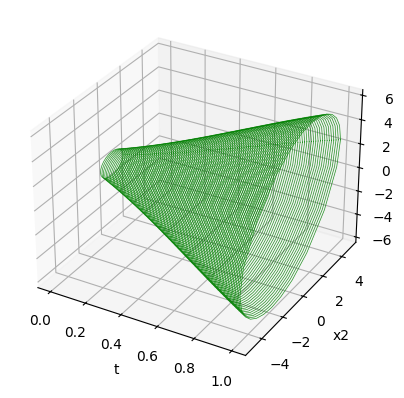

In [18]:
plot_tube(param, np.linspace(0, 1, 100), 25, np.array([1, 2]), 'g')

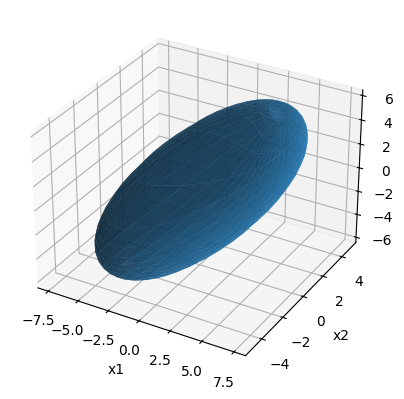

In [19]:
proj = get_3d_proj(param, 1, 20)
plot_3d_proj(proj)

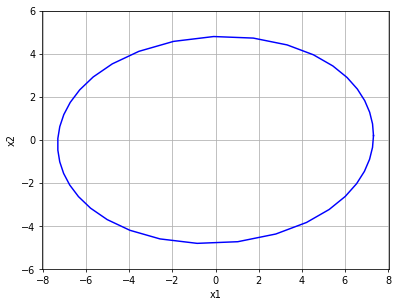

In [27]:
t = 1
appr = get_approx(param, t)
plot_approx(appr)

# Пример. Построение оценок

In [20]:
A = lambda t: np.array([[1, t],
                        [0, -1.5]])
B = lambda t: np.array([[1, 0.3],
                        [0, 1 + np.exp(t)]]) 
q = lambda t: np.zeros(2)
Q = lambda t: np.array([[1, -0.1 * t**2],
                        [-0.1 * t**2, 1]])
dim = A(0).shape[0]
t0 = 0
x0 = np.zeros(2)
X0 = np.eye(2)
grid_size = 1000

param = {'A': A, 'B': B, 'q': q, 'Q': Q, 't0': t0, 'x0': x0, 'X0': X0, 'gr_sz': grid_size, 'dim': dim}

In [21]:
t = 1
appr = get_approx(param, t)

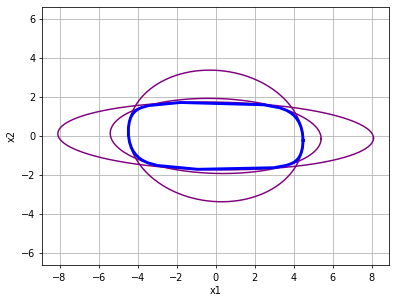

In [45]:
# внешние оценки
fig, ax = plt.subplots()
fig.dpi = 70
l = np.array([[1, 0], [0, 1], [-0.3, -1]])
for i in range(0, 3):
    q, Q = get_ext_ellipse(param, t, l[i])
    plot_ellipse(q, Q, 'purple')

ax.plot(appr[0], appr[1], c = 'b', lw=3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.grid()
ax.axis('equal')
plt.show()

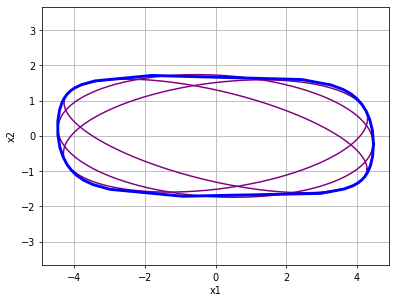

In [46]:
# внутренние оценки
fig, ax = plt.subplots()
fig.dpi = 70
l = np.array([[1, 0.6], [-1, 1], [0, -1]]) # меняем направление
for i in range(0, 3):
    q, Q = get_int_ellipse(param, t, l[i])
    plot_ellipse(q, Q, 'purple')

ax.plot(appr[0], appr[1], c = 'b', lw=3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.grid()
ax.axis('equal')
plt.show()


# Пример. Сравнение оценок

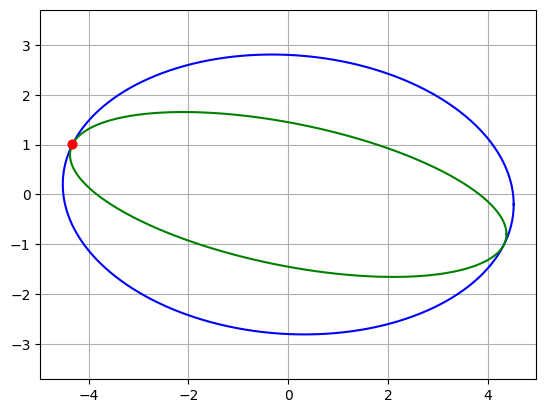

In [47]:
l = np.array([-2, 1])
center1, config1 = get_ext_ellipse(param, 1, l)
center1, config1

center2, config2 = get_int_ellipse(param, 1, l)
center2, config2

plot_ellipse(center1, config1, 'b')
plot_ellipse(center2, config2, 'g')
sup1 = support_func(center1, config1, l)
sup2 = support_func(center2, config2, l)

plt.plot(sup1[0], sup1[1], 'or')  #опорная функция, те точка проекции множества достижимости
plt.plot(sup2[0], sup2[1], 'or')

plt.axis('equal')
plt.grid()

# Пример. Большие размерности

In [52]:
A = lambda t: np.eye(20) * (t + 1)
B = lambda t: t * np.eye(20) + np.random.randint(1, 5, size=(20, 20))
q = lambda t: np.zeros(20)
Q = lambda t: np.eye(20) * np.exp(t)
dim = A(0).shape[0]
t0 = 0
x0 = np.zeros(20)
X0 = np.eye(20)
grid_size = 1000

param = {'A': A, 'B': B, 'q': q, 'Q': Q, 't0': t0, 'x0': x0, 'X0': X0, 'gr_sz': grid_size, 'dim': dim}

C:\Users\Настя\AppData\Local\Temp\ipykernel_4392\2330688014.py:15: RuntimeWarning: invalid value encountered in sqrt
  p[i] = np.sqrt(np.dot(l, X_fund[i] @ B(tau) @ Q(tau) @ B(tau).T @ X_fund[i].T @ l))


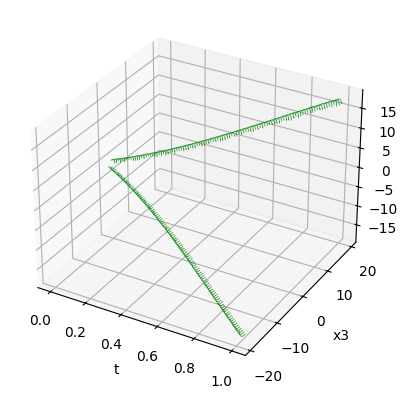

In [54]:
plot_tube(param, np.linspace(0, 1, 100), 15, np.array([2, 3]), 'g')

C:\Users\Настя\AppData\Local\Temp\ipykernel_4392\2330688014.py:15: RuntimeWarning: invalid value encountered in sqrt
  p[i] = np.sqrt(np.dot(l, X_fund[i] @ B(tau) @ Q(tau) @ B(tau).T @ X_fund[i].T @ l))


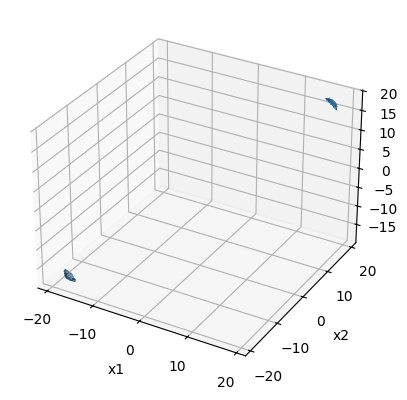

In [55]:
proj = get_3d_proj(param, 1, 20)
plot_3d_proj(proj)